## Objetivos
Exercitar os seguintes conceitos trabalhados no Módulo:
- Coleta de dados;
- Manipulação e visualização de dados;
- Tratamento de dados;
- Aplicação de algoritmo de Machine Learning;
- Análise de dados gerados;
- Conhecimento teórico ministrado nas videoaulas. 

#Enunciado
Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a
relação entre os dados de colesterol e peso com a incidência de problemas que
influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos
seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e
tratamento para esses tipos de causa, a operadora quer realizar um estudo para
identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar medidas preventivas e palestras de cuidados médicos. Para isso, a operadora conta com a equipe de arquiteto de big data para ajuda-los a encontrar o grupo de risco dentre essas pessoas. Através da análise dos dados, os analistas da operadora de seguro de saúde identificaram 4 grandes grupos:

1. Alto Risco
2. Risco Moderado alto
3. Risco Moderado baixo
4. Baixo risco

###Atividades
Os alunos deverão desempenhar as seguintes atividades:
1. Criar um projeto no Google Drive.
2. Coletar e analisar os dados dos seguintes datasets:
a. dados_clientes
b. estados_brasileiros
c. idade_clientes
3. Manipular dados e corrigir erros se necessário;
4. Implementar algoritmo não supervisionado Kmeans;
5. Criar agrupamento para 4 grupos distintos;
6. Responder as questões teóricas e práticas do trabalho.

### Dicas:
1. Para o cálculo do WCSS e análise de cluster, vocês devem escolher
apenas atributos de peso e colesterol.
2. Utilize se necessário a estratégia de exclusão de dados ausentes nos
datasets.
3. Atenção para os indicadores dos agrupamentos realizados.
4. Analisem os dados com cuidado, visualizem os dados nos gráficos.
5. Terceiro cluster é diferente de cluster = 3.
6. Ao analisar os grupos de riscos, observem cuidadosamente a coloração
para responder as questões de centroides.
3
7. As bases de dados utilizadas no trabalho podem ser obtidas também no
link: https://github.com/ProfLeandroLessa/desafio-M1-ABD.


# Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol.

Para isso, vamos seguir as etapas do processamento do Big Data

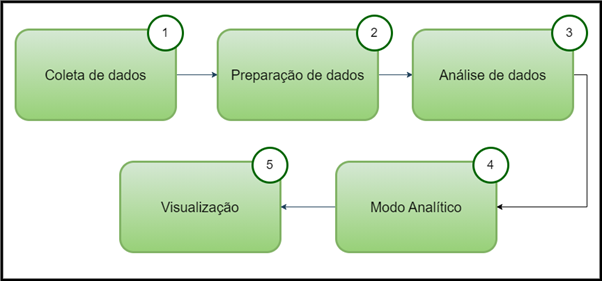


# Coleta dos dados 
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes. 

Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv. 

# Coletando dados de estados brasileiros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo 
PATH = r'/content/drive/MyDrive/Colab Notebooks/Arquivos Bootcamp IGTI'
estados = pd.read_csv(PATH + '/estados_brasileiros.csv', sep = ';', encoding='latin-1')


In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


# Coletando dados de clientes

In [ ]:
clientes = pd.read_excel(PATH + '/dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


# Coletando dados das idades dos clientes

In [ ]:
idade = pd.read_csv(PATH + '/idade_clientes.csv', sep = ';', encoding='latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Preparação dos dados 
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.

# Analisando as variáveis da base de dados

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


#Analisando dados ausentes

In [ ]:
# Verificando valores ausentes/nulos na base        # há 2 valores ausentes na coluna pais
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()                              # há 5 valores ausentes na coluna peso

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
# Verificando os registros com valores nulos        # localizar(.loc) na coluna peso quais são os valores que estão nulos, somente excluir registros caso a base de dados sejam muito grande e os dados retirados não incluenciem.
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identicamos 5 valores ausentes na base de dados de clientes.
Para esse caso, temos 3 opções para tratamento de dados númericos. 

1. Eliminação dos registros
2. Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores extremos;
3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos . (medida que pega o valor central dos dados) 


Por exemplo:

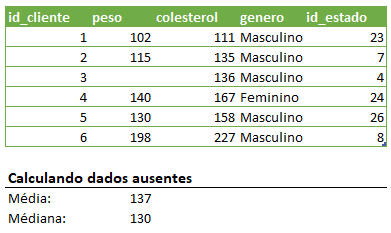

# Eliminando dados ausentes - Tratamento de dados ausentes

In [ ]:
#Dados Ausentes
clientes.dropna(subset=['peso'], inplace=True) # para eliminar o registro. Inplace = True siginifica que quer alterar os dados naquele dataframe

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

Alterando os dados por outras medidas


In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


In [ ]:
# Realizando a média e mediana da variável peso
#media = clientes.peso.mean()                   # mean para calcular a media arquivo_name.coluna.mean()
#mediana = clientes.peso.median()               # mean para calcular a media arquivo_name.coluna.median()

In [ ]:
# verificando valores
#print(f"O valor da média dos pesos é:{media}\nO valor da mediana é {mediana}")


In [ ]:
#Fazendo arrendondamento da variável média
#round(media,2)

In [ ]:
#preencher valores ausentes pela média
#clientes.peso.fillna(round(media,2), inplace=True)

In [ ]:
# Verifica se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

# Substituindo variável categórica (pais) - Tratamento de dados ausentes

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
#estados.pais.fillna('Brasil', inplace=True)

In [ ]:
#Dados Ausentes
estados.dropna(subset=['pais'], inplace=True) # para eliminar o registro. Inplace = True siginifica que quer alterar os dados naquele dataframe

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Analisando distribuição dos dados


In [ ]:
import matplotlib.pyplot as plt


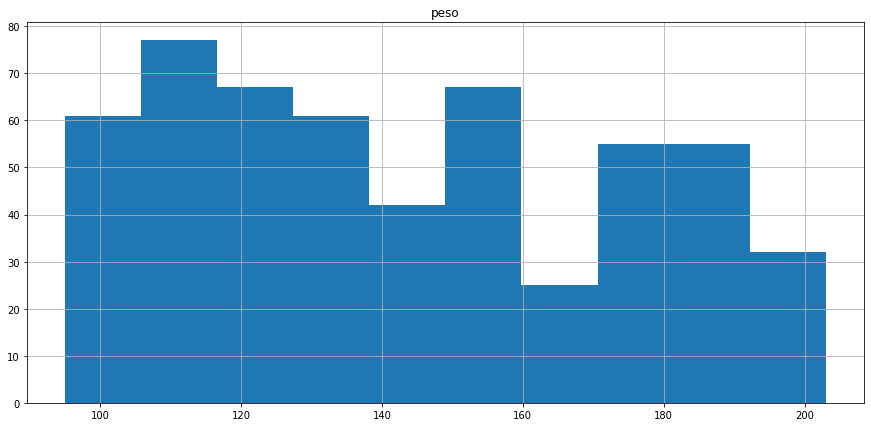

In [ ]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

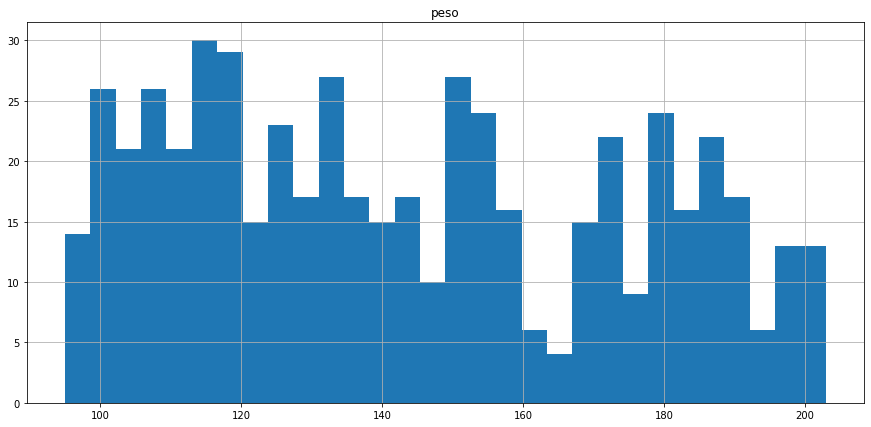

In [ ]:
clientes.hist(column='peso', figsize=(15,7), bins=30)    #utilizando o bins para deteminar a quantidade de colunas
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe61f8b0910>]],
      dtype=object)

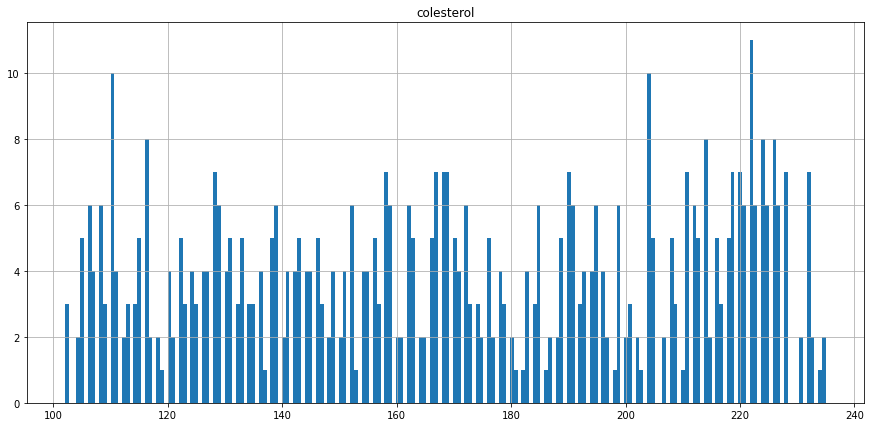

In [ ]:
clientes.hist(column='colesterol', figsize=(15,7), bins=200)            #utilizando o bins para deteminar a quantidade de colunas

In [ ]:
#Criando um Identificador para a variável genero
from sklearn.preprocessing import LabelEncoder    #biblioteca para pocessar e usando fit transform para transformar em numeração

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [ ]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe610872ad0>]],
      dtype=object)

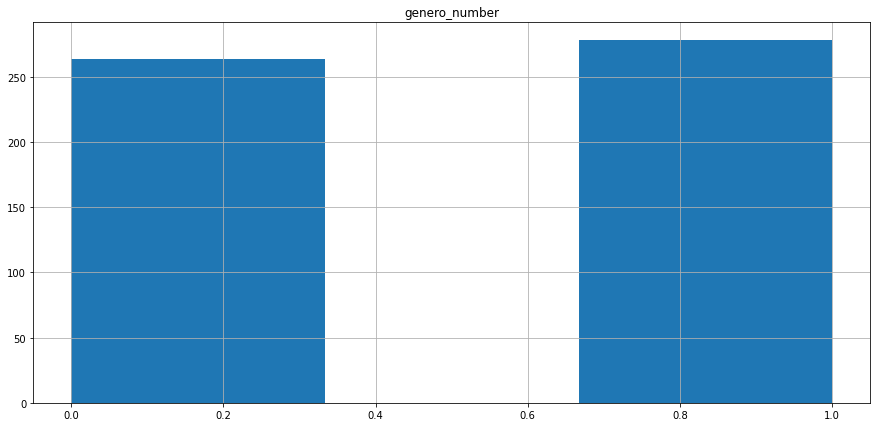

In [ ]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3 )

# Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta



In [ ]:
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [ ]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [ ]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')                     #fazendo um merge(join) para juntas as duas tabelas, estados + clientes, utilizando sort para ordenar pelo ID cliente
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
#realiza Junção(join) entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa   # após fazer o join o indice ficou "embaralhado"

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True)  # resetando para re-ajustar o indice da base

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


# Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [ ]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
# Alterando as linhas da variável sigla_estado 
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [ ]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [ ]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


# Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de faciliar a visuliazação.

In [ ]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
17,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
64,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
83,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
430,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
155,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
372,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [ ]:
base_completa = base_completa[['cod_cliente','genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]].reset_index(drop=True)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


# Análise de dados
É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestesterol, peso e idade das pessoas.

#Aplicando método do cotovelo
Vamos iniciar visualizando identificando o número de clusters necessário para realizar o agrupamento

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
dados_cliente = base_completa[['colesterol','peso']]
dados_cliente.head()

,colesterol,peso
0,111,102.0
1,135,115.0
2,136,115.0
3,158,130.0
4,227,198.0


In [ ]:
wcss_clientes = calcular_wcss(dados_cliente) # chamando a função para chamar o calculo de wcss

In [ ]:
type(wcss_clientes)

list

In [ ]:
# Visualizando os dados obtidos do WCSS     #lembrando que o cluster começa em 1, apesar de aparecer 0 na contagem
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 1248240.6686746986
O cluster 1 possui valor de WCSS de: 298932.7377352369
O cluster 2 possui valor de WCSS de: 127842.60787249672
O cluster 3 possui valor de WCSS de: 73809.93553059456
O cluster 4 possui valor de WCSS de: 49068.8738718445
O cluster 5 possui valor de WCSS de: 34064.50002100837
O cluster 6 possui valor de WCSS de: 25079.92393550797
O cluster 7 possui valor de WCSS de: 20378.05126656164
O cluster 8 possui valor de WCSS de: 16003.657266380145
O cluster 9 possui valor de WCSS de: 13385.38391038145


# Visualizando o gráfico do cotovelo

In [ ]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [ ]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()



In [ ]:
kmeans_clientes = KMeans(n_clusters= 4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


# Calcula os centroides de cada cluster

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

#cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Alto Risco'
#cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] = 'Risco Moderado alto'
#cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Risco Moderado baixo'
#cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Baixo risco'



array([[218.98591549, 184.32394366],
       [154.20661157, 127.57024793],
       [119.57364341, 106.90697674],
       [186.03773585, 152.32075472]])

In [ ]:
dados_cliente

,colesterol,peso
0,111,102.0
1,135,115.0
2,136,115.0
3,158,130.0
4,227,198.0
...,...,...
493,207,172.0
494,157,129.0
495,115,107.0
496,147,117.0


Aqui temos os centroides dos 4 cluster de acordo com os atributos. 
Nesse exemplo vemos os centroides de 'peso', 'colesterol','idade' respectivamente.

In [ ]:
grafico = px.scatter(x = base_completa['peso'], 
                            y = base_completa['colesterol'], 
                            color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

# Visualizando e alterando layout do gráfico

In [ ]:
grafico = px.scatter(x = base_completa['colesterol'], 
                     y = base_completa['peso'], 
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'peso',                  
                  ) 


fig.show()

# Criando Função para Gerar gráficos

In [ ]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x, 
                      y = y, 
                      color= base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,                  
                    ) 

  fig.show()

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [ ]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

# Segmentando os clientes baseado na análise dos clusters

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar  em 3 tipos:


Alto risco: Peso e colesterol altos

Baixo risco: Baixo peso e colesterol baixo

Moderado risco: peso e colesterol medianos




In [ ]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)


In [ ]:
cluster_clientes = base_completa

In [ ]:
# Seguimentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] = 'Risco Moderado alto'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Risco Moderado baixo'
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Baixo risco'



In [ ]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado baixo


# Análises dos clusters criados

In [ ]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [ ]:
# Verifica os valores de colesterol por cluster
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [ ]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,142,25,Rio Grande do Sul,10
Baixo risco,129,25,Amazonas,10
Risco Moderado alto,106,25,Pernambuco,7
Risco Moderado baixo,121,25,Sergipe,9


In [ ]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
103,112,Masculino,66,179.0,214,11,Mato Grosso,MT,Brasil,0,Alto Risco
142,155,Masculino,16,167.0,204,11,Mato Grosso,MT,Brasil,0,Alto Risco
146,160,Masculino,23,171.0,212,11,Mato Grosso,MT,Brasil,0,Alto Risco
151,168,Masculino,34,184.0,222,11,Mato Grosso,MT,Brasil,0,Alto Risco
178,198,Masculino,28,173.0,211,11,Mato Grosso,MT,Brasil,0,Alto Risco
204,227,Masculino,35,184.0,220,11,Mato Grosso,MT,Brasil,0,Alto Risco
223,248,Masculino,28,171.0,204,11,Mato Grosso,MT,Brasil,0,Alto Risco
329,361,Feminino,34,180.0,218,11,Mato Grosso,MT,Brasil,0,Alto Risco
470,518,Feminino,19,172.0,210,11,Mato Grosso,MT,Brasil,0,Alto Risco


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  185.983333   8.032754  168.0  180.00   
                     Masculino   82.0  183.109756  10.743940  167.0  173.25   
Baixo risco          Feminino    58.0  108.396552   6.472451   96.0  104.00   
                     Masculino   71.0  105.690141   5.953610   95.0  101.50   
Risco Moderado alto  Feminino    59.0  152.135593   7.300112  140.0  145.00   
                     Masculino   47.0  152.553191   6.730232  140.0  148.00   
Risco Moderado baixo Feminino    63.0  129.317460   7.079788  116.0  125.00   
                     Masculino   58.0  125.672414   6.383608  115.0  120.25   

                                  50%     75%    max  
nome_cluster         genero                           
Alto Risco           Feminino   186.0  192.00  203.0  
                     Masculino  182.0  189.75  203.0  
Baixo risco          Feminino   110.0  113.00  118.0  
                     Masculino  105.0  110.00  118.0  
Risco Moderado alto  Feminino   154.0  157.00  169.0  
                     Masculino  151.0  154.50  168.0  
Risco Moderado baixo Feminino   129.0  135.00  142.0  
                     Masculino  125.5  131.00  140.0

In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['idade'].describe()

count       mean        std   min    25%  \
nome_cluster         genero                                                
Alto Risco           Feminino    60.0  41.400000  14.297327  16.0  32.75   
                     Masculino   82.0  44.524390  15.798285  16.0  32.00   
Baixo risco          Feminino    58.0  42.172414  15.152023  20.0  29.25   
                     Masculino   71.0  43.929577  15.712892  17.0  31.50   
Risco Moderado alto  Feminino    59.0  42.271186  14.904096  16.0  29.50   
                     Masculino   47.0  43.276596  16.048435  17.0  29.50   
Risco Moderado baixo Feminino    63.0  40.825397  13.362851  18.0  31.50   
                     Masculino   58.0  44.000000  15.417010  17.0  29.00   

                                 50%    75%   max  
nome_cluster         genero                        
Alto Risco           Feminino   39.5  55.00  66.0  
                     Masculino  44.5  59.75  69.0  
Baixo risco          Feminino   41.0  50.75  70.0  
                     Masculino  42.0  58.00  70.0  
Risco Moderado alto  Feminino   43.0  52.50  70.0  
                     Masculino  45.0  55.00  70.0  
Risco Moderado baixo Feminino   39.0  50.50  69.0  
                     Masculino  45.0  57.75  70.0

In [ ]:
cluster_clientes.groupby(['nome_cluster'])['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


# Exportando dados 

In [ ]:
cluster_clientes.to_csv('/content/drive/MyDrive/Colab Notebooks/Arquivos Bootcamp IGTI/classificacao_clientes.csv', sep = ';', encoding='latin1', index = False) 